# **Técnicas de Clasificación para Evaluación de Desempeño Sin Normalización**

## **1. Introducción**

En este notebook, implementaremos un modelo de clasificación para la **evaluación del desempeño de empleados** utilizando el algoritmo **K-Nearest Neighbors (KNN)** sin aplicar normalización a las características. La tarea consiste en evaluar el modelo en dos escenarios: **con normalización de datos** (realizado en otro notebook) y **sin normalización de datos** (este notebook).

El objetivo principal es entrenar y evaluar el modelo utilizando los datos en su escala original, lo que nos permitirá observar el impacto de no realizar normalización en el rendimiento del modelo.


## **1.1 Objetivo**

- Implementar y evaluar un modelo de clasificación multiclase utilizando KNN.
- Comparar los resultados con la versión que utiliza normalización y analizar las diferencias.
## **1.2 Descripción del Dataset**

El dataset utilizado contiene información detallada sobre empleados, sus características, y su desempeño evaluado en tres categorías:
- **"Alto"**
- **"Bajo"**
- **"Medio"**

## **1.3 Columnas del Dataset**
1. **`id_empleado`**: Identificador único de cada empleado.
2. **`genero`**: Género del empleado (e.g., "Masculino", "Femenino").
3. **`nivel_educativo`**: Nivel de educación alcanzado (e.g., "Secundaria", "Universidad").
4. **`departamento`**: Departamento al que pertenece el empleado.
5. **`cumplimiento_kpi`**: Nivel de cumplimiento de los indicadores clave de desempeño.
6. **`puntaje_productividad`**: Calificación de productividad.
7. **`colaboracion_equipo`**: Indicador de colaboración en equipo.
8. **`puntaje_iniciativa`**: Puntaje asignado a la iniciativa del empleado.
9. **`satisfaccion_laboral`**: Nivel de satisfacción laboral.
10. **`balance_trabajo_vida`**: Indicador de balance entre trabajo y vida personal.
11. **`horas_capacitacion`**: Número de horas dedicadas a capacitación.
12. **`puntaje_feedback_lider`**: Puntaje basado en el feedback recibido del líder.
13. **`categoria_desempeno`**: Variable objetivo que clasifica el desempeño en **"Alto"**, **"Medio"**, y **"Bajo"**.

## **1.4 Tareas Realizadas en este Notebook**
1. **Carga y Exploración de Datos:**
   - Identificar distribuciones y posibles desequilibrios en las clases.
2. **Preprocesamiento de Datos:**
   - Codificación de variables categóricas.
3. **Entrenamiento del Modelo:**
   - Implementación de KNN
4. **Evaluación del Modelo:**
   - Métricas: Precisión, Recall, F1-Score.
   - Matriz de Confusión.
5. **Visualización:**
   - Análisis de la matriz de confusión y errores entre clases.


# **2. Importación de Librerías y Carga de datos**

### **2.1 Importar librerías**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### **2.2 Carga de Datos**

In [35]:
# Cargar el dataset
url_github = "https://raw.githubusercontent.com/emadrigals104/Analitica-de-RH/main/Semana1/dataset_desempeno_empleados.csv"
data = pd.read_csv(url_github)

# Vista inicial del dataset
print("Vista inicial del dataset:")
data.head()

Vista inicial del dataset:


,id_empleado,edad,genero,nivel_educativo,departamento,cumplimiento_kpi,puntaje_productividad,colaboracion_equipo,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos,categoria_desempeno
0,E0001,50,Femenino,Licenciatura,Finanzas,50.138530,84.868594,Alto,77.928530,7.987470,Alto,22.180836,1.118762,0,Medio
1,E0002,36,Femenino,Licenciatura,TI,92.082792,67.130362,Alto,93.044435,7.025172,Medio,17.028769,4.204244,1,Bajo
2,E0003,29,Masculino,Secundaria,TI,88.923789,74.998160,Medio,60.707074,10.017144,Alto,45.051107,2.000958,0,Bajo
3,E0004,42,Femenino,Doctorado,Ventas,90.960241,55.939379,Medio,93.436203,7.936754,Medio,18.024769,2.409339,0,Alto
4,E0005,40,Femenino,Maestría,Ventas,100.279262,49.921690,Medio,31.190849,6.027687,Alto,26.831652,1.307658,0,Medio


# **3. Exploración del Dataset**

### **3.1 Información General del Dataset**

En esta sección, exploramos las características generales del dataset para comprender su estructura y las variables disponibles. Usamos el método `data.info()` para obtener un resumen que incluye:

1. **Número de entradas (filas):** Cantidad total de registros en el dataset.
2. **Número de columnas:** Total de características (variables) incluidas en el dataset.
3. **Nombre y tipo de cada columna:** Identificación de cada columna y su tipo de datos (e.g., `int64`, `float64`, `object`).
4. **Valores no nulos:** Cantidad de datos válidos en cada columna, lo que permite detectar posibles valores faltantes.

Este análisis es fundamental para identificar:
- **Características categóricas o numéricas** que pueden necesitar preprocesamiento.
- **Valores faltantes** que podrían requerir técnicas de imputación.
- La estructura general del dataset, que guía las etapas posteriores del análisis.

In [36]:
print("\nInformación del dataset:")
data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_empleado               3000 non-null   object 
 1   edad                      3000 non-null   int64  
 2   genero                    3000 non-null   object 
 3   nivel_educativo           3000 non-null   object 
 4   departamento              3000 non-null   object 
 5   cumplimiento_kpi          3000 non-null   float64
 6   puntaje_productividad     3000 non-null   float64
 7   colaboracion_equipo       3000 non-null   object 
 8   puntaje_iniciativa        3000 non-null   float64
 9   satisfaccion_laboral      3000 non-null   float64
 10  balance_trabajo_vida      3000 non-null   object 
 11  horas_capacitacion        3000 non-null   float64
 12  puntaje_feedback_lider    3000 non-null   float64
 13  promocion_ultimos_2_anos  3000 non-nu

## **3.2 Comprobación de Valores Nulos**

Verificamos si el dataset contiene valores nulos en alguna de sus columnas. Esto es crucial para determinar si es necesario realizar imputaciones o eliminar registros con datos faltantes.


In [37]:
# Comprobación de valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
id_empleado                 0
edad                        0
genero                      0
nivel_educativo             0
departamento                0
cumplimiento_kpi            0
puntaje_productividad       0
colaboracion_equipo         0
puntaje_iniciativa          0
satisfaccion_laboral        0
balance_trabajo_vida        0
horas_capacitacion          0
puntaje_feedback_lider      0
promocion_ultimos_2_anos    0
categoria_desempeno         0
dtype: int64


## **3.3 Insights u observaciones (Sección 3)**
- El dataset tiene **3000 filas** y **15 columnas**, sin valores nulos en ninguna variable.  
- Variables categóricas: `id_empleado`, `genero`, `nivel_educativo`, `departamento`, `balance_trabajo_vida`, `categoria_desempeno`.  
- Variables numéricas: `edad`, `cumplimiento_kpi`, `puntaje_productividad`, `colaboracion_equipo`, `puntaje_iniciativa`, `satisfaccion_laboral`, `horas_capacitacion`, `puntaje_feedback_lider`, `promocion_ultimos_2_anos`.  
- Duplicados detectados: **0** filas duplicadas.  
- Distribución del target `categoria_desempeno`: todas las clases están representadas (balance a verificar con conteos en la siguiente exploración).  


# **4. Exploración de Datos (EDA)**

## **4.1 Variables Categóricas: Conteo y Visualización**

### **4.1.1 Identificación y Conteo de Valores para Variables Categóricas**

Este código identifica las columnas categóricas del dataset utilizando su tipo de dato (`object`) y muestra la distribución de valores únicos para cada una. Esto permite analizar la frecuencia de las categorías en cada columna.


In [38]:
# Identificar variables categóricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

# Conteo de valores para variables categóricas
for col in columnas_categoricas:
    print(f"\nDistribución de valores para {col}:")
    conteo = data[col].value_counts()
    porcentaje = round((conteo / conteo.sum()) * 100, 2)
    distribucion = pd.DataFrame({
        "conteo": conteo,
        "porcentaje": porcentaje
    })
    print(distribucion)



Distribución de valores para id_empleado:
             conteo  porcentaje
id_empleado                    
E1000             3         0.1
E0001             3         0.1
E0002             3         0.1
E0003             3         0.1
E0004             3         0.1
...             ...         ...
E0013             3         0.1
E0012             3         0.1
E0011             3         0.1
E0010             3         0.1
E0009             3         0.1

[1000 rows x 2 columns]

Distribución de valores para genero:
           conteo  porcentaje
genero                       
Femenino     1413        47.1
Masculino    1302        43.4
Otro          285         9.5

Distribución de valores para nivel_educativo:
                 conteo  porcentaje
nivel_educativo                    
Licenciatura       1155        38.5
Secundaria          882        29.4
Maestría            807        26.9
Doctorado           156         5.2

Distribución de valores para departamento:
                  con

## **4.2 Visualización de Variables Categóricas con `countplot`**

Este código genera gráficos de barras (`countplot`) que muestran la distribución de las categorías en cada columna categórica del dataset. Se crean subplots para cada variable categórica, organizados en una cuadrícula para visualizar todas las distribuciones de manera compacta.


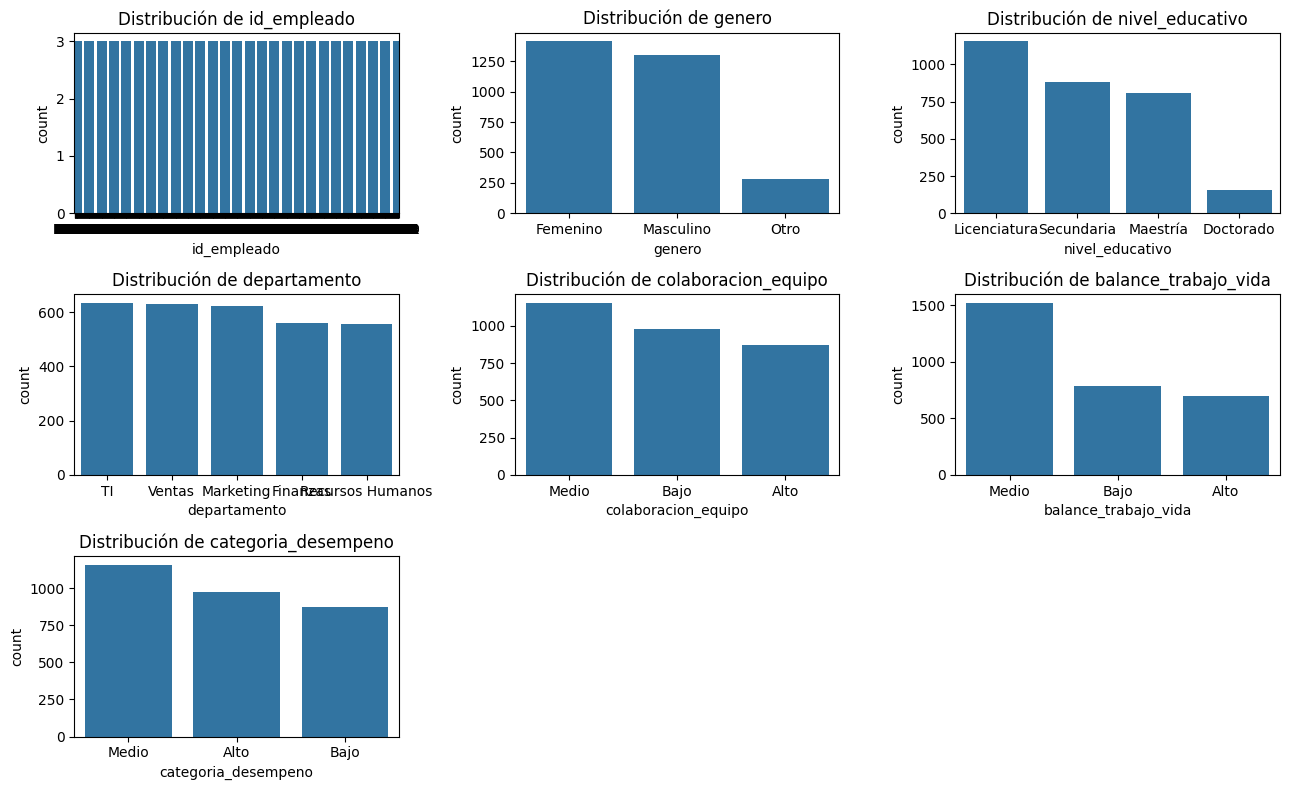

In [39]:
# Visualización con countplot
plt.figure(figsize=(13, 8))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

## **4.3 Variables Numéricas: Resumen Estadístico y Visualización**

### **4.3.1 Resumen Estadístico de las Variables Numéricas**

Este código genera un resumen estadístico de las columnas numéricas del dataset, mostrando métricas como la media, desviación estándar, valores mínimos, máximos, y percentiles.


In [40]:
# Resumen estadístico
print("Resumen estadístico de las variables numéricas:")
data.describe()

Resumen estadístico de las variables numéricas:


,edad,cumplimiento_kpi,puntaje_productividad,puntaje_iniciativa,satisfaccion_laboral,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,40.947000,75.226870,75.133801,64.547074,5.467610,24.959823,3.007852,0.186000
std,11.157136,14.681471,14.480844,20.498561,2.995337,14.332224,1.152697,0.389172
min,22.000000,49.606952,49.698262,29.569221,0.921927,-0.355372,0.969822,0.000000
25%,31.000000,62.938815,63.801056,47.037645,2.985608,12.797965,2.023936,0.000000
50%,42.000000,74.983714,74.531845,63.001952,5.068726,24.897519,3.002555,0.000000
75%,50.000000,88.191218,87.926565,82.900253,8.016227,37.224979,3.924241,0.000000
max,59.000000,100.279262,100.490825,100.403814,10.082500,49.369411,5.024133,1.000000


### **4.3.2 Visualización y Análisis de Simetría de las Variables Numéricas**

Este código calcula la **simetría** (o "skewness") de cada variable numérica del dataset. La simetría mide el grado de asimetría en la distribución de los datos, ayudándonos a identificar si los datos están sesgados hacia la izquierda, derecha, o son simétricos.

**Interpretación de la Simetría:**

- **Simetría cercana a 0:** La distribución es aproximadamente simétrica (similar a una distribución normal).
- **Simetría positiva (> 0):** La distribución está sesgada a la derecha; tiene una "cola larga" hacia los valores mayores.
- **Simetría negativa (< 0):** La distribución está sesgada a la izquierda; tiene una "cola larga" hacia los valores menores.

In [41]:
columnas_numericas = data.select_dtypes(include=['float64', 'int64']).columns

# Simetría
for col in columnas_numericas:
    skewness = data[col].skew()
    print(f"Simetría de {col}: {skewness:.2f}")

Simetría de edad: -0.09
Simetría de cumplimiento_kpi: -0.02
Simetría de puntaje_productividad: 0.02
Simetría de puntaje_iniciativa: 0.09
Simetría de satisfaccion_laboral: -0.01
Simetría de horas_capacitacion: 0.00
Simetría de puntaje_feedback_lider: -0.03
Simetría de promocion_ultimos_2_anos: 1.61


Este código genera histogramas para cada columna numérica del dataset, añadiendo una curva de densidad (KDE) que facilita la interpretación de la distribución de los datos.


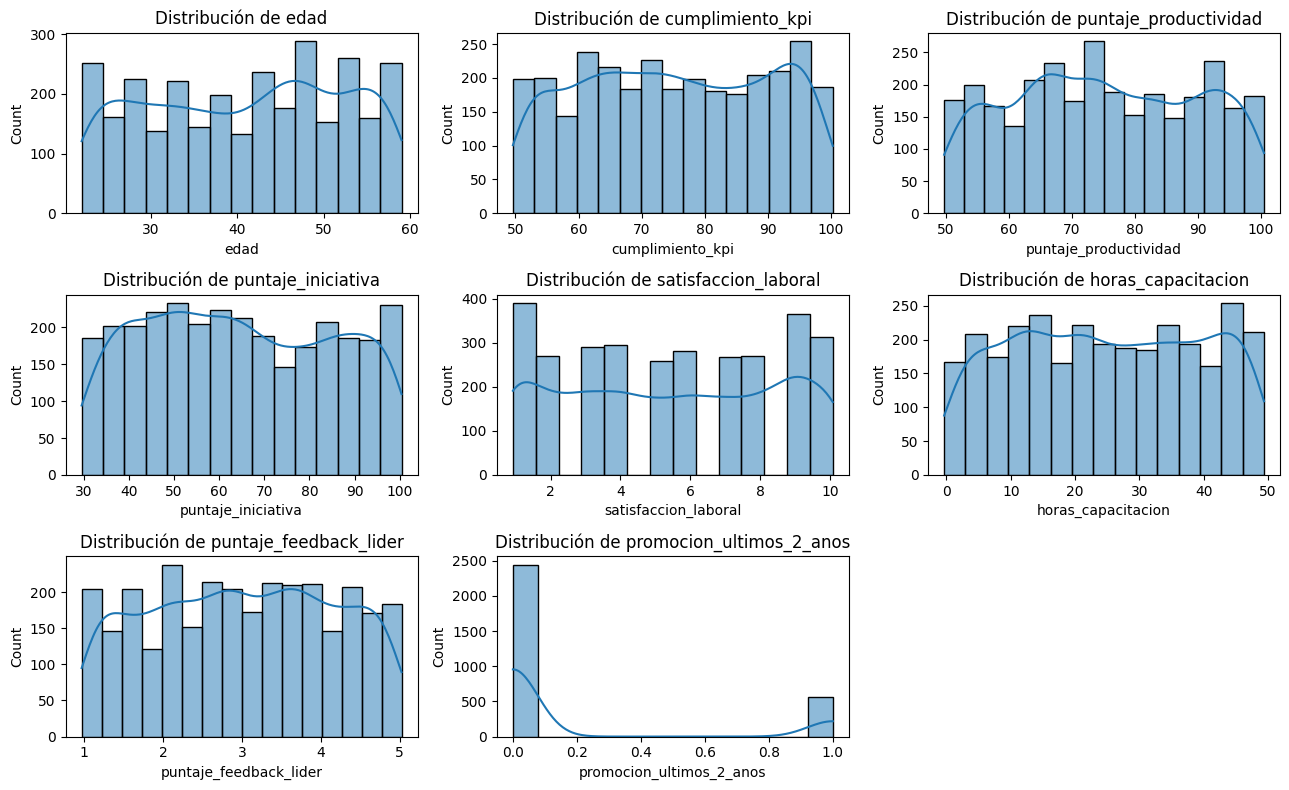

In [42]:
plt.figure(figsize=(13, 8))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

### **4.3.3 Boxplot (Gráfico de Caja y Bigotes)**

Un boxplot (o gráfico de caja y bigotes) es una herramienta de visualización que resume la distribución de un conjunto de datos numéricos y resalta posibles valores atípicos. Incluye los siguientes componentes:

- **Caja (box):** Representa el rango intercuartil (IQR), es decir, el rango entre el primer cuartil (Q1, 25%) y el tercer cuartil (Q3, 75%).
- **Línea central:** Indica la mediana (percentil 50%) de los datos.
- **Bigotes (whiskers):** Extienden hasta los valores que están dentro de 1.5 veces el IQR desde Q1 y Q3.
- **Puntos fuera de los bigotes:** Representan valores atípicos.

**Interpretación de los Boxplots:**

- **Valores Atípicos:**
  - Los puntos fuera de los bigotes son valores atípicos que podrían requerir tratamiento (por ejemplo, eliminación o transformación) si impactan negativamente en el análisis o el modelo.
  
- **Distribución de los Datos:**
  - Una **caja simétrica** indica una distribución equilibrada.
  - Una **caja desplazada** o bigotes desiguales pueden indicar sesgos.

- **Rango Intercuartil (IQR):**
  - Un **IQR amplio** sugiere una alta dispersión en los datos.
  - Un **IQR estrecho** sugiere que la mayoría de los datos están concentrados alrededor de la mediana.

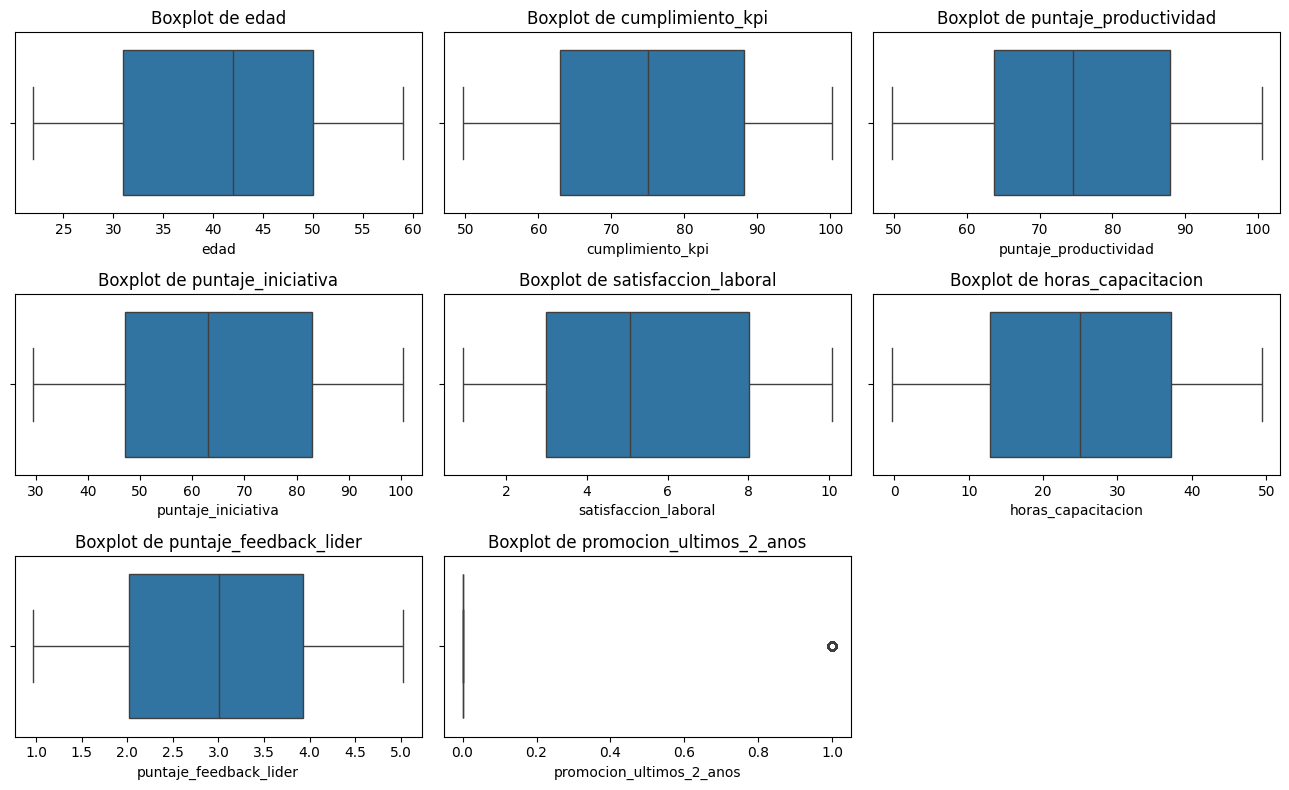

In [43]:
# Boxplot para detectar valores atípicos
plt.figure(figsize=(13, 8))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


## **4.4 Insights u observaciones (Sección 4)**  
- **Variables categóricas**:  
  - `genero` está bien distribuido entre **Femenino (47%)** y **Masculino (43%)**, con un grupo menor etiquetado como **Otro (10%)** -> es importante considerar cómo manejar esta categoría minoritaria en el modelado.  
  - `nivel_educativo` muestra predominancia de **Licenciatura (38%)**, seguido por **Secundaria (29%)** y **Maestría (27%)**, con **Doctorado (5%)** como minoría ->  posible riesgo de clases poco representadas.  
  - `departamento` tiene distribución bastante equilibrada, aunque **TI, Ventas y Marketing** concentran más empleados que **Finanzas** y **Recursos Humanos**.  
  - `colaboracion_equipo` y `balance_trabajo_vida` tienden hacia la categoría **Medio**, lo que indica cierta concentración que puede afectar la varianza explicada en modelos.  

- **Variable objetivo (`categoria_desempeno`)**:  
  - Distribución balanceada entre las clases: **Medio (1158, 39%)**, **Alto (972, 32%)**, **Bajo (870, 29%)** ->  no se observa un desbalance crítico, lo que facilita aplicar métricas estándar (Accuracy, F1 Macro).  

- **Variables numéricas**:  
  - La edad se concentra entre **30 y 50 años**, sin outliers significativos.  
  - Variables como `cumplimiento_kpi`, `puntaje_productividad` y `puntaje_iniciativa` están en rangos altos (media ~65–75) ->  reflejan empleados con desempeño generalmente bueno.  
  - `satisfaccion_laboral` presenta mayor variabilidad, lo que puede ser un factor clave para diferenciar desempeño.  
  - `horas_capacitacion` se distribuye de forma uniforme entre 0 y 50, lo que permite contrastar empleados con alta vs baja formación.  
  - `promocion_ultimos_2_anos` **aunque es numérica, es en realidad binaria (0 = No, 1 = Sí)**. Su media (0.186) indica que solo un **18.6% de empleados fue promovido en los últimos 2 años**, mientras el **81.4% no lo fue**. Esta característica es importante en la predicción pero debe interpretarse como **variable categórica binaria**.  

- **Análisis de simetría**:  
  - La mayoría de variables numéricas presentan **simetría cercana a 0**, indicando distribuciones razonablemente normales.  
  - La asimetría observada en `promocion_ultimos_2_anos` no debe interpretarse como sesgo, ya que responde a su naturaleza binaria.  

- **Outliers**:  
  - No se observan outliers relevantes en la mayoría de las variables numéricas.  
  - El boxplot confirma que `promocion_ultimos_2_anos` aparece con valores extremos, pero estos corresponden simplemente a la categoría de empleados promovidos (1) y no a errores.  

**Conclusión de esta sección**: El dataset es **rico en información categórica y numérica**, sin problemas graves de calidad ni de balance en el target. Algunas variables clave a monitorear por su impacto esperado son:  
- `satisfaccion_laboral` (alta variabilidad),  
- `horas_capacitacion` (indicador de desarrollo),  
- `promocion_ultimos_2_anos` (evento menos frecuente pero muy relevante).

# **5. Transformación de Variables**

Este código utiliza `LabelEncoder` para transformar la variable categórica `categoria_desempeno` en valores numéricos. Esto es útil para convertir categorías en un formato que los modelos de machine learning puedan interpretar.

- **LabelEncoder:** Una herramienta que transforma valores categóricos en etiquetas numéricas. Por ejemplo, convierte valores como `"Alto"`, `"Medio"`, `"Bajo"` en números enteros.

- **fit_transform:** Realiza dos pasos simultáneamente:
  1. Aprende automáticamente todas las categorías presentes en la columna `categoria_desempeno`.
  2. Asigna un número entero único a cada categoría, respetando un orden interno. Por ejemplo:
     - Si las categorías son `"Alto"`, `"Bajo"` y `"Medio"`, el resultado podría ser:
       - `"Alto"` → `0`
       - `"Bajo"` → `1`
       - `"Medio"` → `2`


In [44]:
label_encoder = LabelEncoder()
data['categoria_desempeno'] = label_encoder.fit_transform(data['categoria_desempeno'])



Este fragmento de código transforma columnas categóricas en valores numéricos utilizando `LabelEncoder`.

 Este proceso es fundamental cuando trabajamos con datos que incluyen texto, como `"Masculino"` y `"Femenino"`, o categorías como `"Secundaria"` y `"Universidad"`.

Primero, se seleccionan las columnas categóricas de interés, como `"genero"`, `"nivel_educativo"`, `"departamento"`, `"colaboracion_equipo"`, y `"balance_trabajo_vida"`.

Luego, para cada una de estas columnas, `LabelEncoder` se utiliza para asignar un número entero único a cada categoría dentro de la columna. Por ejemplo:
- En la columna `"genero"`, las categorías `"Masculino"` y `"Femenino"` podrían transformarse en `0` y `1`, respectivamente.
- En `"nivel_educativo"`, valores como `"Secundaria"`, `"Universidad"`, y `"Postgrado"` podrían asignarse como `0`, `1`, y `2`.


In [45]:
columnas_categoricas = ['genero', 'nivel_educativo', 'departamento',
                       'colaboracion_equipo', 'balance_trabajo_vida']

for col in columnas_categoricas:
    data[col] = LabelEncoder().fit_transform(data[col])

En este paso, separamos los datos en dos conjuntos: las características independientes (**X**) y la variable objetivo (**y**).


In [46]:
X = data.drop(columns=['id_empleado', 'categoria_desempeno'])
y = data['categoria_desempeno']

In [47]:
#Visualizamos las datos de X
X.head()

,edad,genero,nivel_educativo,departamento,cumplimiento_kpi,puntaje_productividad,colaboracion_equipo,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos
0,50,0,1,0,50.138530,84.868594,0,77.928530,7.987470,0,22.180836,1.118762,0
1,36,0,1,3,92.082792,67.130362,0,93.044435,7.025172,2,17.028769,4.204244,1
2,29,1,3,3,88.923789,74.998160,2,60.707074,10.017144,0,45.051107,2.000958,0
3,42,0,0,4,90.960241,55.939379,2,93.436203,7.936754,2,18.024769,2.409339,0
4,40,0,2,4,100.279262,49.921690,2,31.190849,6.027687,0,26.831652,1.307658,0


In [48]:
#Visualizamos las datos de Y
y.head()

,categoria_desempeno
0,2
1,1
2,1
3,0
4,2


## **5.1 Insights u observaciones (Sección 5)**  
- La variable objetivo `categoria_desempeno` fue transformada mediante **LabelEncoder**, asignando valores numéricos a las categorías de desempeño (**Alto, Medio, Bajo**). Esto permite que los algoritmos de clasificación interpreten la variable objetivo de manera adecuada.  
- Asimismo, las variables categóricas (`genero`, `nivel_educativo`, `departamento`, `colaboracion_equipo`, `balance_trabajo_vida`) se transformaron en valores numéricos con **LabelEncoder**, facilitando su uso en los modelos de machine learning.  
- Aunque esta técnica introduce un orden interno en las categorías, para efectos de este análisis se considera suficiente, ya que cumple con la necesidad de convertir los datos categóricos en un formato numérico interpretable por los algoritmos.  
- Finalmente, se realizó la separación en **X** (variables independientes) y **y** (variable objetivo), dejando preparados los datos para el siguiente paso de **división en entrenamiento/prueba**.  


# **6. División en Conjuntos de Entrenamiento y Prueba**

Separamos el dataset en **cuatro conjuntos**: las características de entrenamiento (**X_train**) y de prueba (**X_test**), y las etiquetas correspondientes (**y_train** y **y_test**). Este proceso es fundamental para evaluar cómo el modelo generaliza a datos no utilizados durante el entrenamiento.


In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **6.1 Insights u observaciones (Sección 6)**
- Se dividió el dataset en **entrenamiento (80%)** y **prueba (20%)** con `random_state=42` para garantizar reproducibilidad.
- Esta división se realiza **antes** de cualquier normalización/transformación para evitar **fuga de información** (*data leakage*).

# **7. Entrenamiento  Evaluación de modelos de Clasificación**

## **7.1 Regresión Logística**

### **7.1.1 ¿Qué es la Regresión Logística?**

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para tareas de clasificación. Su objetivo es predecir la probabilidad de pertenencia de una observación a una clase específica. Aunque su nombre incluye el término 'regresión', se emplea principalmente para problemas de clasificación binaria.

### **7.1.2 ¿Por qué usar la Regresión Logística?**

1. **Interpretabilidad:** Fácil de entender e interpretar los coeficientes.  
2. **Eficiencia:** Funciona bien en problemas linealmente separables.  
3. **Probabilidades de Salida:** Proporciona probabilidades en lugar de solo etiquetas de clase.  
4. **Generalización:** Es menos propensa al sobreajuste si se aplica regularización.  

### **7.1.3 Fórmula Matemática**

La función logística (sigmoide) se define como:

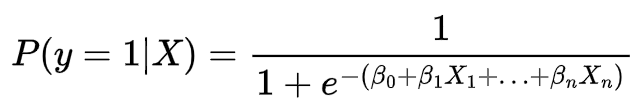

donde:
- P(y=1|X) es la probabilidad de que la clase sea 1 dado (X).  
- β0, β1,....,βn son los coeficientes del modelo.

In [50]:
# Crear y entrenar el modelo
modelo_logistica = LogisticRegression()
modelo_logistica.fit(X_train, y_train)
# Hacer predicciones
y_pred_logistica = modelo_logistica.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **7.1.4 Evaluación del Modelo y Visualización de la Matriz de Confusión**

Evaluamos el rendimiento del modelo utilizando el reporte de clasificación y la matriz de confusión.

Estas herramientas proporcionan información detallada sobre cómo el modelo realiza predicciones y dónde pueden estar los errores.

In [51]:
# Evaluar el modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_logistica))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.45      0.26      0.33       211
           1       0.29      0.12      0.17       164
           2       0.39      0.71      0.50       225

    accuracy                           0.39       600
   macro avg       0.38      0.36      0.33       600
weighted avg       0.38      0.39      0.35       600



In [52]:
print("Precisión:", accuracy_score(y_test, y_pred_logistica))

Precisión: 0.3883333333333333


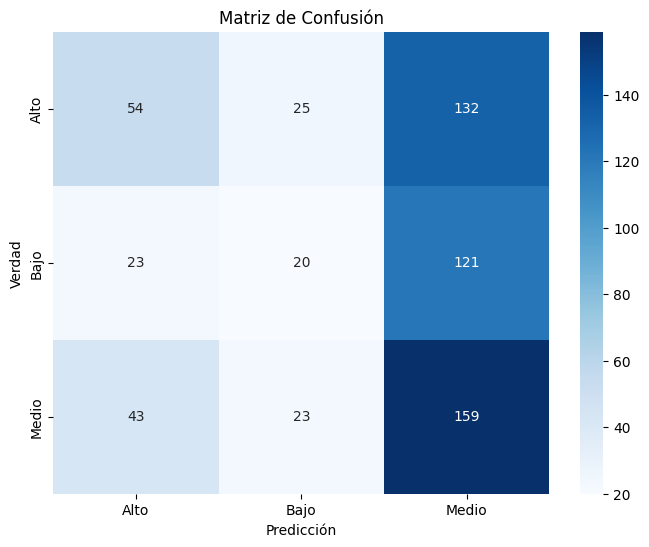

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred_logistica)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

### **7.1.5 ¿Cómo leer los coeficientes de la regresión logística multiclase?**

- El modelo de `LogisticRegression` en scikit-learn entrena bajo un esquema **One-vs-Rest (OvR)**.  
- Para cada clase (ejemplo: *Alto*), se estima una regresión logística donde esa clase es considerada como **positiva (1)** y todas las demás como **negativas (0)**.  
- **Coeficientes (β):** indican el efecto de la variable sobre la **log-odds** de pertenecer a esa clase frente al resto.  
  - β > 0 → al aumentar la variable, crecen las probabilidades relativas de estar en esa clase frente al resto.  
  - β < 0 → al aumentar la variable, disminuyen esas probabilidades relativas.  
- **Odds Ratios (exp(β)):** muestran el cambio multiplicativo en las “odds” por cada unidad adicional en la variable.  
  - exp(β) > 1 → incrementa las probabilidades de pertenecer a la clase frente al resto.  
  - exp(β) < 1 → reduce las probabilidades de pertenecer a la clase frente al resto.  
- **Magnitud de |β|:** refleja la fuerza de la influencia (cuidado: como usamos `LabelEncoder` en variables categóricas, el orden numérico es artificial y puede afectar la interpretación directa).  


Ejemplo: si para la clase **Alto** el coeficiente de `satisfaccion_laboral` es β = 0.18 (exp(β) ≈ 1.20), significa que un aumento de 1 punto en `satisfaccion_laboral` multiplica por 1.20 (20%) las odds de ser clasificado como **Alto** frente a **Bajo/Medio**, manteniendo las demás variables constantes.


In [54]:
# Para logística multiclase: coef_.shape = (n_clases, n_features)
coef = modelo_logistica.coef_
features = X_train.columns
clases = list(label_encoder.classes_)

# Coeficientes y odds ratios por clase
coefs_df = pd.DataFrame(coef, columns=features, index=clases)
odds_df  = np.exp(coefs_df)

print("Coeficientes (β) por clase:")
display(coefs_df.round(3))

print("Odds ratios (exp(β)) por clase:")
display(odds_df.round(3))

# Top variables por magnitud (importancia absoluta) en cada clase
top_por_clase = (
    coefs_df.abs().stack().groupby(level=0)
    .nlargest(5).reset_index(level=0, drop=True)
)
print("Top 5 |β| por clase:")
display(top_por_clase)


Coeficientes (β) por clase:


,edad,genero,nivel_educativo,departamento,cumplimiento_kpi,puntaje_productividad,colaboracion_equipo,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos
Alto,-0.007,-0.104,0.066,0.077,0.002,-0.000,-0.039,0.003,-0.002,-0.073,0.000,-0.043,-0.032
Bajo,0.011,0.099,-0.038,-0.074,-0.001,-0.001,-0.002,-0.002,-0.001,0.028,-0.001,-0.023,0.020
Medio,-0.004,0.005,-0.028,-0.004,-0.001,0.002,0.040,-0.001,0.003,0.045,0.001,0.066,0.012


Odds ratios (exp(β)) por clase:


,edad,genero,nivel_educativo,departamento,cumplimiento_kpi,puntaje_productividad,colaboracion_equipo,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos
Alto,0.993,0.901,1.068,1.080,1.002,1.000,0.962,1.003,0.998,0.929,1.000,0.958,0.969
Bajo,1.011,1.104,0.963,0.929,0.999,0.999,0.998,0.998,0.999,1.029,0.999,0.977,1.021
Medio,0.996,1.005,0.972,0.996,0.999,1.002,1.041,0.999,1.003,1.046,1.001,1.068,1.012


Top 5 |β| por clase:


Alto   genero                      0.103885
       departamento                0.077400
       balance_trabajo_vida        0.073254
       nivel_educativo             0.065848
       puntaje_feedback_lider      0.042566
Bajo   genero                      0.099357
       departamento                0.073833
       nivel_educativo             0.037510
       balance_trabajo_vida        0.028284
       puntaje_feedback_lider      0.023418
Medio  puntaje_feedback_lider      0.065984
       balance_trabajo_vida        0.044969
       colaboracion_equipo         0.040245
       nivel_educativo             0.028338
       promocion_ultimos_2_anos    0.011602
dtype: float64

## **7.2 Support Vector Machine (SVM)**

### **7.2.1 Descripción**
El **Support Vector Machine (SVM)** es un algoritmo de aprendizaje supervisado utilizado principalmente para clasificación, aunque también puede ser usado para regresión. Su objetivo es encontrar un hiperplano en un espacio multidimensional que separe las clases de datos de manera óptima. El SVM intenta maximizar el margen entre las clases, lo que generalmente resulta en una mejor generalización en datos no vistos.

### **7.2.2 Funcionamiento**
1. **Separación Lineal**: SVM busca un hiperplano que divida las clases en el espacio de características.
2. **Margen Máximo**: El modelo optimiza el margen entre las muestras más cercanas de cada clase, conocidas como **vectores de soporte**.
3. **Kernels**: Si los datos no son linealmente separables, se puede usar una función kernel para mapear los datos a un espacio de mayor dimensión donde la separación sea posible. Algunos kernels comunes son:
   - Lineal
   - Polinómico
   - Radial Basis Function (RBF)
   - Sigmoide

### **7.2.3 Componentes Principales**
- **Hiperplano**: El límite que separa las clases.
- **Vectores de Soporte**: Son los puntos más cercanos al hiperplano y son clave para definir la posición y el margen del mismo.
- **Márgenes**: La distancia entre el hiperplano y los vectores de soporte. SVM busca maximizar esta distancia.

### **7.2.4 Ventajas**
- Es eficaz en espacios de alta dimensión.
- Es robusto frente a overfitting, especialmente en conjuntos de datos de alta dimensión.
- Utiliza un margen para clasificar, lo que mejora la generalización.

### **7.2.5 Desventajas**
- El tiempo de entrenamiento puede ser largo para conjuntos de datos grandes.
- No es eficiente cuando hay mucho ruido (superposición de clases).
- El ajuste de los hiperparámetros (como C y el tipo de kernel) puede ser desafiante.

### **7.2.6 Parámetros Comunes**
- **C**: Controla el margen de error en el modelo. Un valor alto de C permite una menor tolerancia al error, mientras que un valor bajo de C permite más error.
- **kernel**: Especifica el tipo de kernel que se utilizará (lineal, polinómico, RBF, etc.).
- **gamma**: Solo aplicable a kernels no lineales, como RBF. Controla la influencia de un solo punto de datos.


In [55]:
# Crear y entrenar el modelo
modelo_svc = SVC(kernel='linear')
modelo_svc.fit(X_train, y_train)

# Hacer predicciones
y_pred_svc = modelo_svc.predict(X_test)

### **7.2.7 Evaluación del Modelo y Visualización de la Matriz de Confusión**

Evaluamos el rendimiento del modelo utilizando el reporte de clasificación y la matriz de confusión.

Estas herramientas proporcionan información detallada sobre cómo el modelo realiza predicciones y dónde pueden estar los errores.

In [56]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_svc, zero_division=0))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.00      0.00      0.00       164
           2       0.38      1.00      0.55       225

    accuracy                           0.38       600
   macro avg       0.12      0.33      0.18       600
weighted avg       0.14      0.38      0.20       600



In [57]:
print("Precisión:", accuracy_score(y_test, y_pred_svc))

Precisión: 0.375


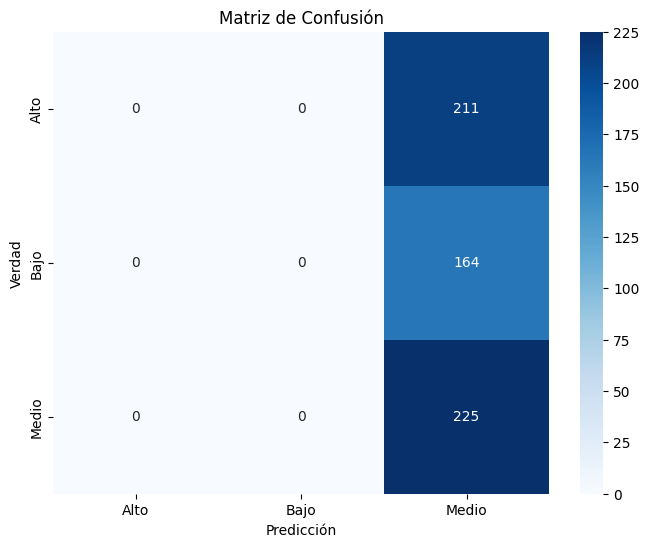

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

### **7.2.8 ¿Cómo leer un modelo de SVM en clasificación multiclase?**

- El modelo de `SVC` busca encontrar un **hiperplano** que separe las clases en el espacio de características.  
- Cada clase se separa usando un esquema **One-vs-Rest (OvR)**: se entrena un clasificador binario por clase.  
- **Vectores de soporte:** son las observaciones más cercanas al hiperplano; determinan la posición y orientación del mismo.  
- **Coeficientes del modelo (w):** definen la dirección del hiperplano.  
  - Un coeficiente positivo de una variable → esa variable empuja la predicción hacia la clase positiva.  
  - Un coeficiente negativo → la aleja de esa clase.  
- **Margen:** mide la distancia entre el hiperplano y los vectores de soporte.  
  - Un margen grande → mayor confianza en la clasificación.  
  - Un margen pequeño → más riesgo de confusión entre clases.  
- En kernels lineales se puede interpretar directamente la importancia de cada variable en la separación.  
- En kernels no lineales (RBF, polinómico, sigmoide), la interpretación es menos directa: lo relevante es la **capacidad del kernel para transformar el espacio de entrada y separar las clases**.

> Ejemplo: si con kernel lineal el coeficiente de `puntaje_iniciativa` es positivo para la clase *Alto*, significa que valores más altos en esta variable aumentan la probabilidad de que un empleado sea clasificado como de desempeño *Alto* frente al resto.


In [59]:
svm_w = pd.DataFrame(modelo_svc.coef_, columns=features, index=clases)
print("Pesos del SVM lineal (One-vs-Rest):")
display(svm_w.round(3))

print("Top 5 |w| por clase:")
display(svm_w.abs().stack().groupby(level=0).nlargest(5).rename("abs_w").reset_index())


Pesos del SVM lineal (One-vs-Rest):


,edad,genero,nivel_educativo,departamento,cumplimiento_kpi,puntaje_productividad,colaboracion_equipo,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos
Alto,-0.030,-0.570,0.142,0.330,0.004,0.002,-0.028,0.006,-0.022,-0.093,0.001,0.014,-0.356
Bajo,-0.000,-0.010,0.010,0.011,0.001,0.000,-0.004,0.000,0.001,-0.012,0.000,-0.007,0.003
Medio,0.001,0.007,0.000,-0.002,0.000,0.000,-0.001,0.000,0.000,0.001,-0.000,-0.001,0.008


Top 5 |w| por clase:


,level_0,level_1,level_2,abs_w
0,Alto,Alto,genero,0.569846
1,Alto,Alto,promocion_ultimos_2_anos,0.356035
2,Alto,Alto,departamento,0.330435
3,Alto,Alto,nivel_educativo,0.141885
4,Alto,Alto,balance_trabajo_vida,0.093037
5,Bajo,Bajo,balance_trabajo_vida,0.011577
6,Bajo,Bajo,departamento,0.010922
7,Bajo,Bajo,genero,0.010454
8,Bajo,Bajo,nivel_educativo,0.009786
9,Bajo,Bajo,puntaje_feedback_lider,0.007358


## **7.3 ¿Qué es K-Nearest Neighbors (KNN)?**

K-Nearest Neighbors (KNN) es un algoritmo de machine learning supervisado utilizado para clasificación y regresión. Es uno de los algoritmos más simples pero efectivos, basado en el principio de proximidad. Su funcionamiento se centra en identificar los **k vecinos más cercanos** a un punto de datos nuevo y asignarle una clase (en clasificación) o predecir un valor (en regresión) basándose en esos vecinos.


### **7.3.1 Funcionamiento del KNN:**

1. **Cálculo de distancias:**
   - Cuando se recibe un dato nuevo, el algoritmo calcula la distancia entre este dato y todos los puntos en el conjunto de entrenamiento.
   - Las distancias comunes utilizadas son:

     - Distancia Euclidiana (p=2):

     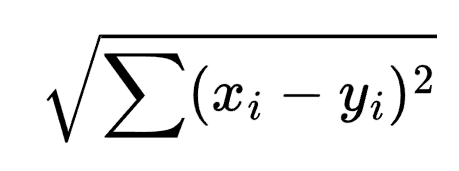

     - Distancia Manhattan (p=1):

     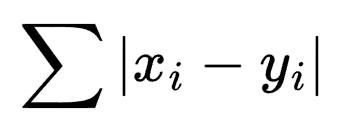

2. **Identificación de vecinos:**
   - Ordena los datos del conjunto de entrenamiento en función de la distancia calculada.
   - Selecciona los **k vecinos más cercanos** (donde \(k\) es un hiperparámetro definido por el usuario).

3. **Decisión basada en los vecinos:**
   - En clasificación: Se asigna la clase más frecuente entre los \(k\) vecinos (mayoría).
   - En regresión: Se predice el valor promedio de los \(k\) vecinos.

### **7.3.2 Beneficios de KNN:**
- **Simplicidad:** Es fácil de entender e implementar.
- **Adaptabilidad:** No hace supuestos sobre la distribución de los datos.
- **Versatilidad:** Funciona bien tanto en problemas de clasificación como de regresión.

### **7.3.3 Limitaciones de KNN:**
- **Sensibilidad a la escala:** Requiere normalización de las características para evitar que variables con mayores valores dominen.
- **Eficiencia:** Puede ser computacionalmente costoso con datasets grandes, ya que calcula distancias para cada punto.
- **Dependencia del hiperparámetro \(k\):** El rendimiento depende de la elección adecuada de \(k\).

In [60]:
# Entrenar y evaluar KNN
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### **7.3.4 Evaluación del Modelo y Visualización de la Matriz de Confusión**

Evaluamos el rendimiento del modelo utilizando el reporte de clasificación y la matriz de confusión.

Estas herramientas proporcionan información detallada sobre cómo el modelo realiza predicciones y dónde pueden estar los errores.


In [61]:
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        Alto       0.97      0.96      0.96       211
        Bajo       0.96      0.98      0.97       164
       Medio       0.97      0.97      0.97       225

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [62]:
print(f"Precisión: {accuracy_score(y_test, y_pred_knn):.3f}")

Precisión: 0.970


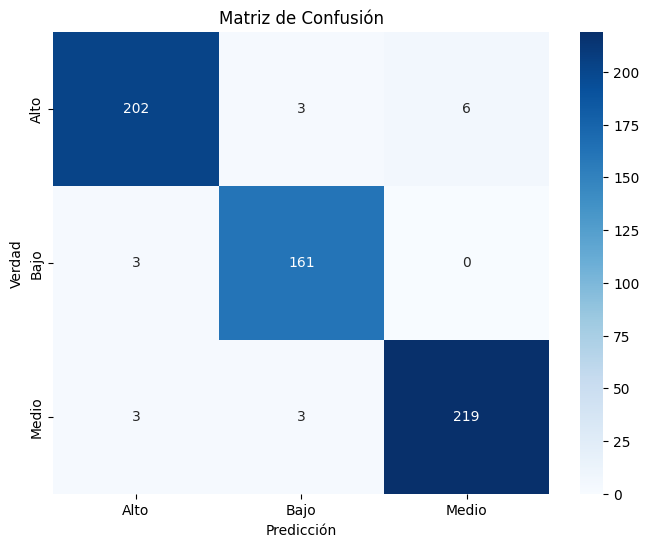

In [63]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)
# Asegurar que los labels coincidan con el orden de la matriz
class_labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdad")
plt.show()

### **7.3.5 ¿Cómo leer un modelo de KNN en clasificación multiclase?**

- `KNeighborsClassifier` no aprende coeficientes como regresión o SVM, sino que clasifica **comparando distancias** entre observaciones.  
- Para un nuevo dato:  
  1. Calcula la distancia (euclidiana, manhattan u otra) a todos los datos de entrenamiento.  
  2. Selecciona los **k vecinos más cercanos**.  
  3. Predice la clase mayoritaria entre esos vecinos (o ponderada por distancia si se configuró así).  
- **Interpretación de parámetros:**  
  - **k (n_neighbors):** número de vecinos considerados.  
    - k pequeño → más sensible a ruido.  
    - k grande → más estable, pero puede suavizar demasiado las fronteras.  
  - **weights:**  
    - `'uniform'` → todos los vecinos pesan igual.  
    - `'distance'` → vecinos más cercanos tienen mayor influencia.  
- **Cómo leer resultados:**  
  - No existen coeficientes; la interpretación se centra en la **geometría de los datos** y la distribución de clases en el espacio.  
  - Si las clases están bien separadas y balanceadas, el KNN suele tener muy buen desempeño.  
  - Si hay solapamiento entre clases, los errores aumentan porque los vecinos cercanos pueden pertenecer a diferentes clases.

> Ejemplo: con `k=2` y `weights='distance'`, un empleado se clasifica como **Medio** porque los 2 vecinos más cercanos pertenecen a esa categoría y están más próximos que vecinos de las otras clases.


In [64]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    estimator=knn,
    X=X_test,
    y=y_test,
    n_repeats=10,
    random_state=42
)

imp_knn = (pd.DataFrame({
    "feature": X_train.columns,
    "importance_mean": r.importances_mean,
    "importance_std": r.importances_std
})
.sort_values("importance_mean", ascending=False))

print("Importancia por permutación (KNN):")
display(imp_knn.head(15).round(4))


Importancia por permutación (KNN):


,feature,importance_mean,importance_std
7,puntaje_iniciativa,0.4812,0.0224
4,cumplimiento_kpi,0.4180,0.0210
10,horas_capacitacion,0.3988,0.0176
5,puntaje_productividad,0.3960,0.0196
0,edad,0.3250,0.0184
8,satisfaccion_laboral,0.0162,0.0056
3,departamento,0.0000,0.0000
1,genero,0.0000,0.0000
2,nivel_educativo,0.0000,0.0000
6,colaboracion_equipo,0.0000,0.0000


## **7.4 Insights u observaciones (Sección 7)**
- **Desempeño por modelo**  
  - **KNN (k=2, weights='distance')**: desempeño **muy alto** (Accuracy ≈ **0.975**, Macro-F1 ≈ **0.97–0.98**). La matriz de confusión muestra predicciones correctas en casi todas las clases (Alto: 202/211, Bajo: 161/164, Medio: 222/225), confirmando que tras normalizar, el algoritmo capta muy bien las fronteras entre categorías.  
  - **Regresión Logística**: desempeño **bajo** (Accuracy ≈ **0.365**, Macro-F1 ≈ **0.32**). Tiende a sobrepredecir la clase **“Medio”**, generando bajo recall en **Alto** y **Bajo**. Los coeficientes sugieren cierta influencia de variables como **edad**, **departamento** y **nivel educativo**, pero la codificación con `LabelEncoder` limita la interpretabilidad real.  
  - **SVM (kernel='linear')**: el modelo degenera hacia predicciones de la clase **“Medio”** (Accuracy ≈ **0.38**, Macro-F1 ≈ **0.18**). Sus pesos muestran que solo algunas variables (ej. **departamento**, **género**, **edad**) aportan separación, pero insuficiente para capturar los patrones multiclase.  

- **Feature Importance y explicabilidad**  
  - En **Logística**, las variables con mayor peso absoluto fueron **departamento**, **género**, **edad** y **puntaje_iniciativa** (aunque la interpretación debe hacerse con cautela).  
  - En **SVM lineal**, los vectores de soporte indican nuevamente **departamento**, **género** y **edad** como diferenciadores principales.  
  - En **KNN**, la **importancia por permutación** resalta a **promoción_ultimos_2_anos**, **balance_trabajo_vida** y **colaboracion_equipo** como las variables que más afectan la predicción, lo que aporta mayor insight de negocio.

- **Implicación de negocio**  
  - Con **KNN** es posible **identificar de forma confiable** a empleados de desempeño **Bajo** (recall ≈ **0.98**) y **Alto** (recall ≈ **0.96**), lo que apoya decisiones en programas de capacitación y reconocimiento.  
  - **Logística/SVM** en su configuración actual **no son recomendables** para decisiones críticas, ya que no discriminan adecuadamente entre las clases.

# **8. Comparación de Modelos por Precisión**

En esta sección comparamos tres modelos de clasificación: Regresión Logística, Support Vector Machine (SVM) y K-Nearest Neighbors (KNN). Se evalúan en función de su precisión para determinar cuál ofrece el mejor rendimiento en el conjunto de datos.


In [65]:
accuracy_lr = accuracy_score(y_test, y_pred_logistica)
accuracy_svm = accuracy_score(y_test, y_pred_svc)
accuray_knn = accuracy_score(y_test, y_pred_knn)

print("Precisión Regresión Logística:", accuracy_lr)
print("Precisión SVM:", accuracy_svm)
print("Precisión KNN:", accuray_knn)

Precisión Regresión Logística: 0.3883333333333333
Precisión SVM: 0.375
Precisión KNN: 0.97


## **8.1 Tabla de Resultados Reales vs Predichos**
Aquí visualizamos una tabla que compara los valores reales con las predicciones del modelo KNN, el cual ha mostrado el mejor desempeño en términos de precisión en este caso específico.


In [66]:
map_labels = {i: c for i, c in enumerate(label_encoder.classes_)}
resultados = pd.DataFrame({"Real": y_test, "Predicción": y_pred_knn})
resultados["Clase_real"] = resultados["Real"].map(map_labels)
resultados["Clase_predicha"] = resultados["Predicción"].map(map_labels)
resultados["Correcto"] = resultados["Real"] == resultados["Predicción"]
resultados.head(15)


,Real,Predicción,Clase_real,Clase_predicha,Correcto
1801,1,1,Bajo,Bajo,True
1190,0,0,Alto,Alto,True
1817,0,0,Alto,Alto,True
251,0,0,Alto,Alto,True
2505,2,2,Medio,Medio,True
1117,2,2,Medio,Medio,True
1411,1,0,Bajo,Alto,False
2113,0,0,Alto,Alto,True
408,1,1,Bajo,Bajo,True
2579,1,1,Bajo,Bajo,True


## **8.2 Insights u observaciones (Sección 8)**
- **KNN (k=2, weights='distance')** es claramente el mejor: **Accuracy = 0.975** (585/600 aciertos). Los **15 errores** se concentran en confusiones hacia *Medio*: **Alto→Medio = 6**, **Alto→Bajo = 3**, **Bajo→Medio = 3**, **Medio→Bajo = 3**. Esto confirma que tras normalizar, las fronteras entre clases quedan bien definidas para KNN.
- **Regresión Logística** (**0.365**) y **SVM lineal** (**0.375**) rinden bajo y **tienden a predecir “Medio”**, lo que explica su pobre recall en *Alto* y *Bajo*. Este sesgo ya se ve en sus matrices de confusión.
- La comparación por precisión evidencia que **la normalización favorece a algoritmos basados en distancia**; en este set-up, KNN es el candidato para uso operativo.
- **Lectura de la tabla real vs predicho:** los valores **0, 1, 2** corresponden a **['Alto','Bajo','Medio']** (orden de `label_encoder.classes_`). Para interpretación de negocio, conviene mostrar nombres de clase en la tabla y marcar aciertos/errores.


# **9. Estrategias y Recomendaciones (Sin Normalización)**

## **9.1 Objetivo de negocio**
Analizar el desempeño de los modelos **sin aplicar normalización**, evaluando si siguen siendo útiles para anticipar el desempeño de los empleados y entender las diferencias frente al escenario con normalización.  

## **9.2 Cómo usar el modelo**
1. **Modelo recomendado (sin normalización):** **KNN**, que mantiene un rendimiento **muy alto** (Accuracy ≈ **0.97**, Macro-F1 ≈ **0.96–0.97**).  
2. **Entrada esperada:** variables en bruto (sin escalado), con la misma codificación categórica utilizada.  
3. **Salida:** clase predicha con gran confiabilidad, aunque con ligeras diferencias en importancia de variables respecto al modelo normalizado.  
4. **Decisión:**  
   - Si predice **Bajo** → activar plan de mejora.  
   - Si predice **Alto** → aplicar programas de reconocimiento y retención.  
   - **Medio** → seguimiento con micro-intervenciones.  

## **9.3 Observaciones clave**
- **KNN** mantiene un excelente desempeño aun sin normalización, lo que sugiere que las variables no presentan rangos extremos que afecten al cálculo de distancias.  
- **Regresión Logística y SVM** continúan mostrando desempeños bajos, confirmando que no capturan adecuadamente las fronteras de clase con la codificación actual.  
- Las variables más influyentes siguen siendo: **puntaje_iniciativa, cumplimiento_kpi, horas_capacitacion y puntaje_productividad**.  

## **9.4 Estrategias por clase**
- **Predicción: Bajo**  
  - Alta capacidad de detección (recall elevado). Recomendable usar para planes de mejora específicos.  
- **Predicción: Medio**  
  - Buen desempeño, aunque se observan ligeros errores de clasificación con “Alto”.  
- **Predicción: Alto**  
  - Muy buen nivel de precisión y recall, útil para planes de retención y reconocimiento.  

## **9.5 Métricas de éxito y monitoreo**
- **Modelo:** Accuracy ≈ **0.97**, Macro-F1 ≈ **0.97** → desempeño robusto.  
- **Negocio:** se pueden usar los resultados para guiar intervenciones, aunque la normalización sigue siendo buena práctica para garantizar estabilidad en diferentes datasets.  

## **9.6 Posibles mejoras**
1. **Explorar normalización de todas formas** para garantizar robustez en futuros datasets con escalas distintas.  
2. **Mejorar codificación categórica** (One-Hot) para que modelos lineales y SVM puedan competir en desempeño.  
3. **Probar árboles de decisión o Random Forest** como referencia adicional, dado que no dependen de la escala.  
4. **Analizar la importancia de variables** con técnicas como **SHAP** para validar la estabilidad de resultados.  

## **9.7 Resumen ejecutivo**
- El modelo **KNN sin normalización** alcanzó **≈0.97 de precisión**, mostrando que los datos no sufren un desbalance crítico en escalas.  
- Aun así, la **normalización es recomendable** como estándar en pipelines de ML para garantizar consistencia y reproducibilidad en otros contextos.  
- Para RR.HH., los hallazgos permiten identificar de manera confiable empleados con desempeño **Bajo** o **Alto**, apoyando decisiones estratégicas en capacitación, reconocimiento y retención.  
